In [15]:
# notebook last tested with abtem version 1.0.0beta13

from abtem import __version__
print('current version:', __version__)

from ase.io import read
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from abtem import *
from abtem.measure import block_zeroth_order_spot

current version: 1.0.0beta29


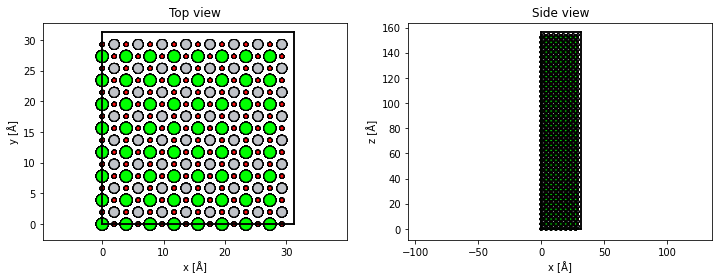

In [2]:
atoms = read('../data/srtio3_100.cif')

atoms *= (8, 8, 40)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

show_atoms(atoms, ax=ax1, title='Top view')
show_atoms(atoms, ax=ax2, plane='xz', title='Side view');

In [7]:
potential = Potential(atoms, 
                      gpts=512, 
                      device='cpu', 
                      projection='infinite', 
                      slice_thickness=atoms.cell[2,2] / 80, 
                      parametrization='kirkland')

In [16]:
wave = PlaneWave(energy=300e3)
wave.grid.match(potential)

wave = wave.build()

propagator = FresnelPropagator()

measurements = []
for i, potential_slice in enumerate(potential):
    potential_slice.transmit(wave)
    propagator.propagate(wave, potential_slice.thickness)
    
    measurement = wave.diffraction_pattern()
    measurement = block_zeroth_order_spot(measurement)
    #measurement = wave.intensity() # uncomment to get realspace intensity instead of diffraction pattern
    
    measurements.append(measurement)

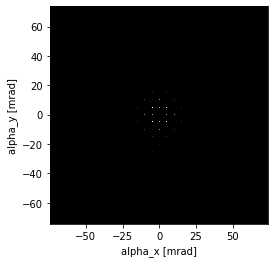

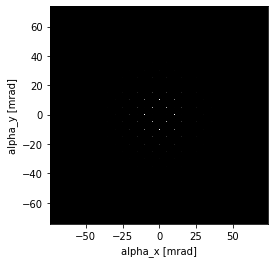

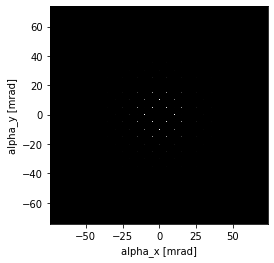

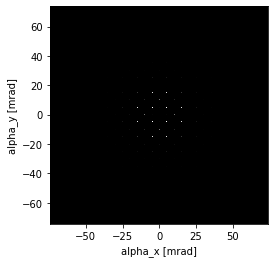

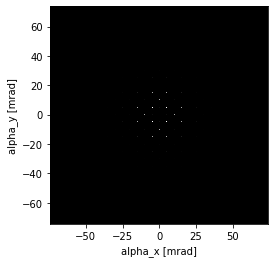

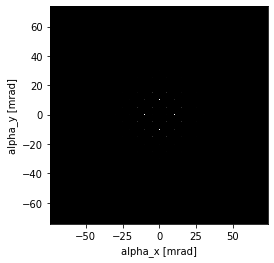

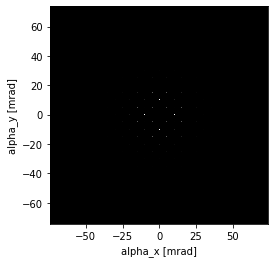

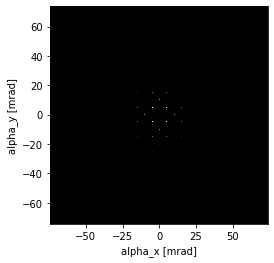

In [19]:
plot_every = 10 # plot every this many slices

for i in range(0, len(measurements), plot_every):
    measurements[i].show()